In [1]:
import numpy as np
from Metrics import *
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import matplotlib
from time import time
import torch_geometric as pyg
from torch_geometric.data import Data
from torch_geometric.utils import to_scipy_sparse_matrix
import csv
from matplotlib import animation

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

def save(data_tuple, name, output_folder):
    with open(f'{output_folder}/{name}.npy', 'wb') as f:
        pickle.dump(data_tuple, f)

import seaborn as sns
import json


matplotlib.rcParams.update({'font.size': 22,
                            'lines.linewidth': 1,
                            'patch.linewidth': 1,})
sns.set_style("darkgrid")

cuda


In [414]:
def make_progression_arr(p_mask_lst):
    mask_arr = np.concatenate(mask_lst, axis=0)
    mask_arr = mask_arr.reshape(-1, mask_lst[0].shape[0])
    mask_arr[mask_arr == 6] = 1
    mask_arr[mask_arr == 7] = 3
    mask_arr[mask_arr == 8] = 4

    tot_evo_time = (mask_arr == 3).sum(axis=0).max()
    cmap_vals = np.linspace(255,0,tot_evo_time)
    progression_arr = np.zeros_like(mask_arr)

    for i in range(mask_arr.shape[1]):
        if (mask_arr[:,i] == 3).sum() > 0:
            progression_arr[:,i][mask_arr[:,i] == 3] = cmap_vals

    return progression_arr

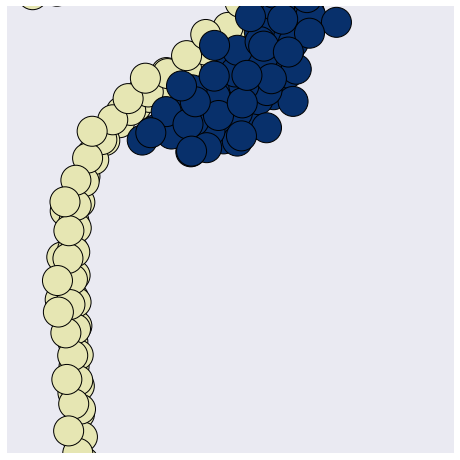

In [435]:
cmap = matplotlib.colormaps['Blues']
folder = 'new_data/testing_loose_bounds_tot/testing_loose_bounds_14/'
data = np.load(folder + '/data.npy', allow_pickle=True)

mask_lst, x_lst, p_lst, q_lst = data
progression_arr = make_progression_arr(mask_lst)

mask_arr = np.concatenate(mask_lst, axis=0)
mask_arr = mask_arr.reshape(-1, mask_lst[0].shape[0])
mask_arr[mask_arr == 6] = 0
mask_arr[mask_arr == 7] = 3
mask_arr[mask_arr == 8] = 4
size = 900

fig, ax = plt.subplots(1, 1, figsize=(8,10), subplot_kw={'projection':'3d'})

def animate(frame, progression_arr=progression_arr, mask_arr=mask_arr, x_lst=x_lst, p_lst=p_lst):
    ax.clear()
    ax.set_axis_off()

    timestep = frame

    p_mask  = mask_arr[timestep]
    p       = p_lst[timestep]
    x       = x_lst[timestep]

    #normalize p
    p /= np.linalg.norm(p, axis=1)[:,None]

    p_mask = p_mask[np.abs(x[:,0]) < 4]
    p = p[np.abs(x[:,0]) < 4]
    progression_arr = progression_arr.T[np.abs(x[:,0]) < 4]
    progression_arr = progression_arr.T
    x = x[np.abs(x[:,0]) < 4]

    vec = np.array([1.0,0,0])
    dot_prod = np.abs(np.dot(p,vec))

    old_p_mask  = p_mask.copy()
    # old_x       = x.copy()
    
    progression_arr = progression_arr.T[np.logical_or((dot_prod < 0.6) , (old_p_mask == 0))]
    p_mask = p_mask[np.logical_or((dot_prod < 0.6) , (old_p_mask == 0))]
    progression_arr = progression_arr.T
    x = x[np.logical_or((dot_prod < 0.6) , (old_p_mask == 0))]

    beige_RGB   = np.array([0.9, 0.9, 0.7, 1])
    MPC_start   = np.array(cmap(255))
    MPC_end     = np.array(cmap(0))

    RGBA_vals = np.zeros((len(x),4) ,dtype=float)
    RGBA_vals[p_mask == 0] = MPC_start
    RGBA_vals[p_mask == 4] = MPC_end
    RGBA_vals[p_mask == 1] = beige_RGB
    RGBA_vals[p_mask == 5] = beige_RGB
    RGBA_vals[p_mask == 9] = beige_RGB
    RGBA_vals[p_mask == 3] = cmap(progression_arr[timestep][p_mask == 3].astype(int))


    scatter = ax.scatter(x[:,0], -x[:,1], x[:,2], s=size, c=RGBA_vals, edgecolors='k', alpha=1)
    ax.set_ylim(0, 15)
    ax.set_zlim(-20, 10)
    ax.axes.set_aspect('equal')
    ax.view_init(0,0)

video_name = 'test'
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=1000, interval=20, repeat=False)
ani.save(video_name+'.mp4')

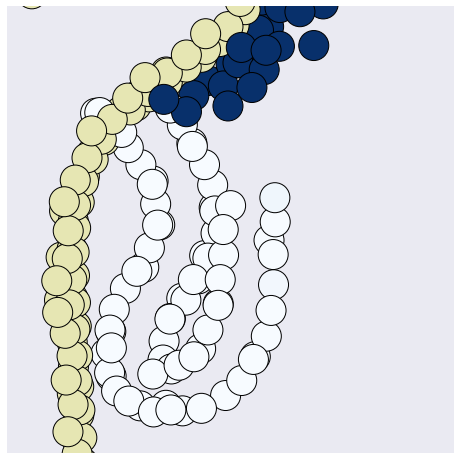

In [416]:
import matplotlib

cmap = matplotlib.colormaps['Blues']

rgba = cmap(255)

folder = 'new_data/testing_loose_bounds_tot/testing_loose_bounds_14/'

data = np.load(folder + '/data.npy', allow_pickle=True)

mask_lst, x_lst, p_lst, q_lst = data
progression_arr = make_progression_arr(mask_lst)

mask_arr = np.concatenate(mask_lst, axis=0)
mask_arr = mask_arr.reshape(-1, mask_lst[0].shape[0])
mask_arr[mask_arr == 6] = 1
mask_arr[mask_arr == 7] = 3
mask_arr[mask_arr == 8] = 4

fig, ax = plt.subplots(1, 1, figsize=(8,10), subplot_kw={'projection':'3d'})
ax.set_axis_off()

limits = 15
size = 900
timestep = 1000

p_mask  = mask_arr[timestep]
p_lst   = p_lst[timestep]
x       = x_lst[timestep]
#normalize p
p_lst /= np.linalg.norm(p_lst, axis=1)[:,None]

p_mask = p_mask[np.abs(x[:,0]) < 4]
p_lst = p_lst[np.abs(x[:,0]) < 4]
progression_arr = progression_arr.T[np.abs(x[:,0]) < 4]
progression_arr = progression_arr.T
x = x[np.abs(x[:,0]) < 4]

vec = np.array([1.0,0,0])
dot_prod = np.abs(np.dot(p_lst,vec))
p_mask = p_mask[dot_prod < 0.6]
progression_arr = progression_arr.T[dot_prod < 0.6]
progression_arr = progression_arr.T
x = x[dot_prod < 0.6]

beige_RGB   = np.array([0.9, 0.9, 0.7, 1])
MPC_start   = np.array(cmap(255))
MPC_end     = np.array(cmap(0))

RGBA_vals = np.zeros((len(x),4) ,dtype=float)
RGBA_vals[p_mask == 0] = MPC_start
RGBA_vals[p_mask == 4] = MPC_end
RGBA_vals[p_mask == 1] = beige_RGB
RGBA_vals[p_mask == 5] = beige_RGB
RGBA_vals[p_mask == 9] = beige_RGB
RGBA_vals[p_mask == 3] = cmap(progression_arr[timestep][p_mask == 3].astype(int))


scatter = ax.scatter(x[:,0], -x[:,1], x[:,2], s=size, c=RGBA_vals, edgecolors='k', alpha=1)
ax.set_ylim(0, 15)
ax.set_zlim(-20, 10)
ax.axes.set_aspect('equal')
ax.view_init(0,0)


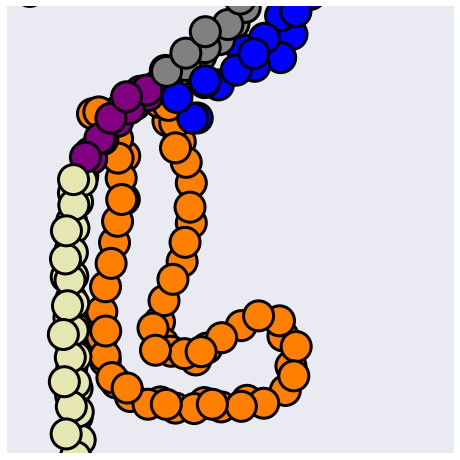

In [316]:
folder = 'new_data/testing_loose_bounds_tot/testing_loose_bounds_14/'

data = np.load(folder + '/data.npy', allow_pickle=True)

mask_lst, x_lst, p_lst, q_lst = data

fig, ax = plt.subplots(1, 1, figsize=(8,10), subplot_kw={'projection':'3d'})
ax.set_axis_off()

limits = 15
size = 900
timestep = 9_00

p_mask  = mask_lst[timestep]
p_lst   = p_lst[timestep]
x       = x_lst[timestep]
#normalize p
p_lst /= np.linalg.norm(p_lst, axis=1)[:,None]

p_mask = p_mask[np.abs(x[:,0]) < 3]
p_lst = p_lst[np.abs(x[:,0]) < 3]
x = x[np.abs(x[:,0]) < 3]

vec = np.array([1.0,0,0])
dot_prod = np.abs(np.dot(p_lst,vec))
p_mask = p_mask[dot_prod < 0.6]
x = x[dot_prod < 0.6]


cmap = np.zeros((len(x),3) ,dtype=float)

black_RGB = np.array([0, 0, 0])
red_RGB = np.array([1, 0, 0])
green_RGB = np.array([0, 1, 0])
blue_RGB = np.array([0, 0, 1])
purple_RGB = np.array([0.5, 0, 0.5])
green_RGB = np.array([0, 1, 0])
orange_RGB = np.array([1, 0.5, 0])
maroon_RGB = np.array([0.5, 0, 0])
grey_RGB = np.array([0.5, 0.5, 0.5])
beige_RGB = np.array([0.9, 0.9, 0.7])

cmap[p_mask == 0] = blue_RGB        #'blue'
cmap[p_mask == 1] = beige_RGB        #'grey'
cmap[p_mask == 3] = orange_RGB     #'orange'
cmap[p_mask == 4] = orange_RGB      #'orange'
cmap[p_mask == 5] = purple_RGB      #'purple'
cmap[p_mask == 6] = green_RGB       #'green'
cmap[p_mask == 7] = orange_RGB       #'black'
cmap[p_mask == 8] = orange_RGB      #'maroon'
cmap[p_mask == 9] = grey_RGB        #'grey'

plt.rcParams['legend.title_fontsize'] = 17.5

scatter = ax.scatter(x[:,0], -x[:,1], x[:,2], s=size, c=cmap, edgecolors='k', alpha=1)
ax.set_ylim(0, 15)
ax.set_zlim(-20, 10)
ax.axes.set_aspect('equal')
ax.view_init(0,0)

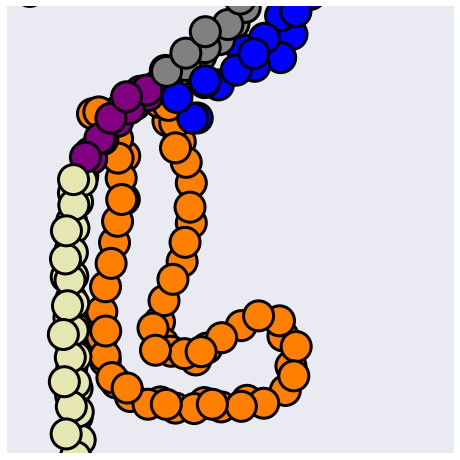

In [212]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.gridspec import GridSpec

folder = 'new_data/testing_loose_bounds_tot/testing_loose_bounds_14/'

data = np.load(folder + '/data.npy', allow_pickle=True)

mask_lst, x_lst, p_lst, q_lst = data

fig, ax = plt.subplots(1, 1, figsize=(8,10), subplot_kw={'projection':'3d'})
ax.set_axis_off()

limits = 15
size = 900
timestep = 9_00

p_mask  = mask_lst[timestep]
p_lst   = p_lst[timestep]
x       = x_lst[timestep]
#normalize p
p_lst /= np.linalg.norm(p_lst, axis=1)[:,None]

p_mask = p_mask[np.abs(x[:,0]) < 3]
p_lst = p_lst[np.abs(x[:,0]) < 3]
x = x[np.abs(x[:,0]) < 3]

vec = np.array([1.0,0,0])
dot_prod = np.abs(np.dot(p_lst,vec))
p_mask = p_mask[dot_prod < 0.6]
x = x[dot_prod < 0.6]


cmap = np.zeros((len(x),3) ,dtype=float)

black_RGB = np.array([0, 0, 0])
red_RGB = np.array([1, 0, 0])
green_RGB = np.array([0, 1, 0])
blue_RGB = np.array([0, 0, 1])
purple_RGB = np.array([0.5, 0, 0.5])
green_RGB = np.array([0, 1, 0])
orange_RGB = np.array([1, 0.5, 0])
maroon_RGB = np.array([0.5, 0, 0])
grey_RGB = np.array([0.5, 0.5, 0.5])
beige_RGB = np.array([0.9, 0.9, 0.7])

cmap[p_mask == 0] = blue_RGB        #'blue'
cmap[p_mask == 1] = beige_RGB        #'grey'
cmap[p_mask == 3] = orange_RGB     #'orange'
cmap[p_mask == 4] = orange_RGB      #'orange'
cmap[p_mask == 5] = purple_RGB      #'purple'
cmap[p_mask == 6] = green_RGB       #'green'
cmap[p_mask == 7] = orange_RGB       #'black'
cmap[p_mask == 8] = orange_RGB      #'maroon'
cmap[p_mask == 9] = grey_RGB        #'grey'

plt.rcParams['legend.title_fontsize'] = 17.5

scatter = ax.scatter(x[:,0], -x[:,1], x[:,2], s=size, c=cmap, edgecolors='k', alpha=1)
ax.set_ylim(0, 15)
ax.set_zlim(-20, 10)
ax.axes.set_aspect('equal')
ax.view_init(0,0)

In [ ]:


cmap = np.zeros((len(x),3) ,dtype=float)

black_RGB = np.array([0, 0, 0])
red_RGB = np.array([1, 0, 0])
green_RGB = np.array([0, 1, 0])
blue_RGB = np.array([0, 0, 1])
purple_RGB = np.array([0.5, 0, 0.5])
green_RGB = np.array([0, 1, 0])
orange_RGB = np.array([1, 0.5, 0])
maroon_RGB = np.array([0.5, 0, 0])
grey_RGB = np.array([0.5, 0.5, 0.5])

cmap[p_mask == 0] = blue_RGB        #'blue'
cmap[p_mask == 1] = red_RGB        #'grey'
cmap[p_mask == 3] = orange_RGB     #'orange'
cmap[p_mask == 4] = orange_RGB      #'orange'
cmap[p_mask == 5] = purple_RGB      #'purple'
cmap[p_mask == 6] = green_RGB       #'green'
cmap[p_mask == 7] = orange_RGB       #'black'
cmap[p_mask == 8] = orange_RGB      #'maroon'
cmap[p_mask == 9] = grey_RGB        #'grey'

plt.rcParams['legend.title_fontsize'] = 17.5

scatter = ax.scatter(x[:,0], -x[:,1], x[:,2], s=size, c=cmap, edgecolors='k', alpha=1)
ax.set_ylim(0, 15)
ax.set_zlim(-20, 10)
ax.axes.set_aspect('equal')

# legend1 = ax.legend(scatter.legend_elements()[0],['Renal epithelial cells','Mesenchyme cells','Ureteric epithelial cells w. extra adhesion','Ureteric epithelial cells'],
#                 loc="lower center", title="Cell types", fontsize=17.5, markerscale=3)
# fig.add_artist(legend1)
ax.view_init(0,0)

# x      = x[p_mask != 0]
# p_mask = p_mask[p_mask != 0]
# cmap = np.empty( len(x) ,dtype=int)

# cmap[p_mask == 0] = 2 #'blue'
# cmap[p_mask == 1] = 9 #'grey'
# cmap[p_mask == 3] = 1 #'orange'
# cmap[p_mask == 4] = 1 #'orange'
# cmap[p_mask == 5] = 4 #'purple'

# ax1.scatter(x[:,0], x[:,1], x[:,2], s=size, c=cmap, edgecolors='k', alpha=1,cmap='Set1')
# ax1.set_xlim(-limits, limits)
# ax1.set_ylim(-limits-20, limits-20)
# ax1.set_zlim(-limits+5/2, limits+5)
# ax1.view_init(0,180)

# ax2.scatter(x[:,0], x[:,1], x[:,2], s=size, c=cmap, edgecolors='k', alpha=1, cmap='Set1')
# ax2.set_xlim(-limits, limits)
# ax2.set_ylim(-limits-20, limits-20)
# ax2.set_zlim(-limits+5, limits+5)
# ax2.view_init(0,-90)

0.2


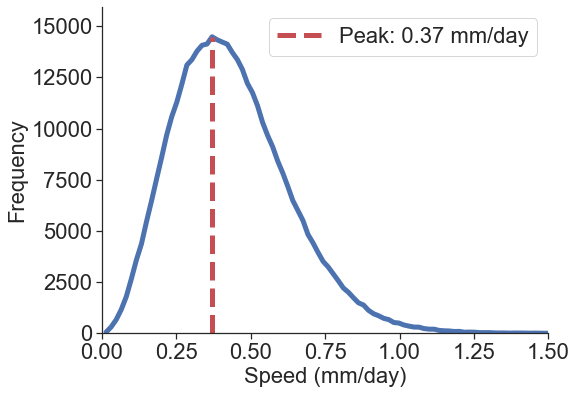

In [50]:
fontsize = 22

custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                  "axes.labelsize": fontsize, "xtick.labelsize": fontsize,"ytick.labelsize": fontsize,
                  "legend.fontsize": fontsize, "legend.title_fontsize": fontsize,
                "lines.linewidth": 5, "figure.figsize": (8, 6),}
sns.set_theme(style="ticks", rc=custom_params)

### Making speedplots for vitro
# noise_lvls_lst1 = np.linspace(0.01, 1, num=20)
# noise_lvls_lst2 = np.linspace(0.0001, 0.01, num=20)
# noise_lvls_lst  = np.linspace(0.01,0.1, num=10) 

noise_lvls_lst = np.linspace(0.1,0.4, num=31) 
val = 10
ml = 0.7
print(noise_lvls_lst[val])
test_folder = f'new_data/vitro_speed_ml7/noise_{noise_lvls_lst[val]:.2f}_ml0_{ml}/data.npy'

data = np.load(test_folder, allow_pickle=True)
mask_lst, x_lst, p_lst, q_lst = data

x_lst_exp = [x_lst[i][None] for i in range(len(x_lst))]
x_arr = np.concatenate(x_lst_exp, axis=0)
x_arr = x_arr[100:]

speeds = np.linalg.norm(x_arr[1:] - x_arr[:-1], axis=2) * 5 / (10/1440) * 0.001

#make histogram and center bins
vals, bins = np.histogram(speeds.flatten(), bins=100, density=False)
bin_centers = 0.5*(bins[1:] + bins[:-1])

#find maximum value
max_val = vals.max()
max_idx = np.where(vals == max_val)

fig, ax = plt.subplots()
ax.plot(bin_centers, vals)
ax.set_ylim(0, max_val*1.1)
ax.set_xlim(0, 1.5)
# Arrow from maximum to x axis
ax.vlines(bin_centers[max_idx], 0, max_val, colors='r', linestyles='dashed', label=f'Peak: {bin_centers[max_idx][0]:.2f} mm/day')
ax.set_ylabel('Frequency')
ax.set_xlabel('Speed (mm/day)')

plt.legend()
plt.show()

In [33]:
np.linspace(0.1,0.4, num=31) 

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ])

In [15]:
def make_p_mask_lst_lst(p_mask_lst):
    cell_lst_lst = []

    for p_mask in p_mask_lst:
        for i in range(len(p_mask)):
            if len(cell_lst_lst) <= i:
                cell_lst_lst.append([p_mask[i]])
            else:
                cell_lst_lst[i].append(p_mask[i])
        
    for i in range(len(cell_lst_lst)):
        cell_lst_lst[i] = np.array(cell_lst_lst[i])

    return cell_lst_lst

def make_cell_pos_lst_lst(p_pos_lst):
    cell_pos_lst_lst = []

    for p_pos in p_pos_lst:
        for i in range(len(p_pos)):
            if len(cell_pos_lst_lst) <= i:
                cell_pos_lst_lst.append([p_pos[i]])
            else:
                cell_pos_lst_lst[i].append(p_pos[i])
        
    for i in range(len(cell_pos_lst_lst)):
        cell_pos_lst_lst[i] = np.array(cell_pos_lst_lst[i])

    return cell_pos_lst_lst

def make_lambda_lst_lst(lambda_lst):
    lambda_lst_lst = []

    for lambda_vals in lambda_lst:
        for i in range(len(lambda_vals)):
            if len(lambda_lst_lst) <= i:
                lambda_lst_lst.append([lambda_vals[i]])
            else:
                lambda_lst_lst[i].append(lambda_vals[i])
        
    for i in range(len(lambda_lst_lst)):
        lambda_lst_lst[i] = np.array(lambda_lst_lst[i])

    return lambda_lst_lst

def filter_mesenchyme(p_mask_lst_lst, pos_lst_lst, lambda_lst_lst=None, include_iREC=False):
    filtered_pos_lst_lst = []

    for i in range(len(p_mask_lst_lst)):
        p_mask = p_mask_lst_lst[i]
        pos = pos_lst_lst[i]

        mask = (p_mask == 0) | (p_mask == 6)

        if include_iREC:
            lambda_vals = lambda_lst_lst[i]
            iREC_mask = p_mask == 3 | p_mask == 7
            iREC_mask = np.logical_and( iREC_mask, ~np.any(lambda_vals[iREC_mask][1:], axis=1) )
            mask = np.logical_or(mask, iREC_mask)
        
        filtered_pos = pos[mask]

        if filtered_pos.shape[0] > 0:
            filtered_pos_lst_lst.append(filtered_pos)

    return filtered_pos_lst_lst

def find_timescale(p_mask_lst, yield_interval=50, iREC_threshold=0):
    evolution_begun      = False
    evolution_terminated = False
    for i in range(len(p_mask_lst)):
        if np.any(p_mask_lst[i] == 3):
            evolution_begun = True
        
        iREC_mask = np.sum(p_mask_lst[i] == 3)
        iREC_mask = np.logical_or(iREC_mask, p_mask_lst[i] == 7)
        if evolution_begun and np.sum(iREC_mask) <= iREC_threshold and i > 100:
            evolution_terminated = True
        
        if evolution_terminated:
            timesteps = (i + 1) * yield_interval
            s_pr_step = (24 * 60 * 60) / timesteps
            s_pr_yield= s_pr_step * yield_interval
            sampling_rate =  int( (20 * 60) // s_pr_yield )
            print(f"Yieldsteps till s-shape : {i + 1}")
            print(f"Timestep till s-shape   : {timesteps}")
            print('Timestep time           : {:.2f}s'.format(s_pr_step))
            print('Yieldstep time          : {:.2f}s'.format(s_pr_yield))
            print('Sampling rate           :', sampling_rate)
            return s_pr_yield, sampling_rate
    
    print('No timescale found')
    print('We assume end of simulation to be S-shape')
    print('\n')

    timesteps = (i + 1) * yield_interval
    s_pr_step = (24 * 60 * 60) / timesteps
    s_pr_yield= s_pr_step * yield_interval
    sampling_rate =  int( (20 * 60) // s_pr_yield )
    print(f"Yieldsteps till s-shape : {i + 1}")
    print(f"Timestep till s-shape   : {timesteps}")
    print('Timestep time           : {:.2f}s'.format(s_pr_step))
    print('Yieldstep time          : {:.2f}s'.format(s_pr_yield))
    print('Sampling rate           :', sampling_rate)
    
    return s_pr_yield, sampling_rate

def make_speed_plot(mcap_lst_lst, s_pr_yield, sampling_rate, include_all_dims=False, ax=None):
    speed_lst_lst = []
    for cell_pos in mcap_lst_lst:
        cell_pos = cell_pos[::sampling_rate]

        if not include_all_dims:
            speeds = np.linalg.norm(cell_pos[1:,1:] - cell_pos[:-1,1:], axis=1)
        else:
            speeds = np.linalg.norm(cell_pos[1:] - cell_pos[:-1], axis=1)

        speeds = (speeds * 5.0)#/ (s_pr_yield * sampling_rate)
        speed_lst_lst.append(speeds)
    
    speed_lst_lst = np.concatenate(speed_lst_lst)
    print(speed_lst_lst.mean())
    if not ax:            
        plt.figure()
        plt.hist(speed_lst_lst, bins=100, histtype='step')#, range=(0, 0.02))
        plt.xlabel("Speed (um/s)")
        #plt.xlim(0, 0.02) 
        plt.ylabel("Frequency");
    else:
        ax.hist(speed_lst_lst, bins=100, histtype='step')#, range=(0, 0.02))
        ax.set_xlabel("Speed (um/s)")
        # ax.set_xlim(0, 0.02) 
        ax.set_ylabel("Frequency");
    
    return speed_lst_lst

def make_autocorr_lst(mcap_lst_lst, s_pr_yield, sampling_rate, include_all_dims=False, ax=None):
    observations_lst_lst= []
    speed_lst           = []
    lags                = np.arange(1,200,1)

    for i in range(len(lags)):
        lag = lags[i]
        for cell_pos in mcap_lst_lst:
            cell_pos = cell_pos[::sampling_rate]

            if not include_all_dims:
                vel = (cell_pos[1:,1:] - cell_pos[:-1,1:])
            else:
                vel = (cell_pos[1:] - cell_pos[:-1])
            

            speed_lst.append(np.linalg.norm(vel, axis=1))

            observations = np.sum(vel[:-lag] * vel[lag:], axis=1)

            if observations.shape[0] == 0:
                continue

            if len(observations_lst_lst) <= i:
                observations_lst_lst.append(observations)
            else:
                observations_lst_lst[i] = np.concatenate([observations_lst_lst[i], observations])

    speed_lst = np.concatenate(speed_lst)
    speed_lst = speed_lst ** 2
    norm_factor = np.mean(speed_lst)

    plot_auto_lst = []
    for i in range(len(observations_lst_lst)):
        obs_mean = np.mean(observations_lst_lst[i], axis=0)
        obs_mean /= norm_factor
        plot_auto_lst.append(observations_lst_lst[i].mean())

    lags = np.arange(1,len(plot_auto_lst) + 1,1) * (sampling_rate * s_pr_yield) / 3600 

    if not ax:
        plt.figure()
        plt.plot(lags, plot_auto_lst)
        plt.xlabel("Time (h)")
        plt.ylabel("Autocorrelation")
    else:
        ax.plot(lags, plot_auto_lst)
        ax.set_xlabel("Time (h)")
        ax.set_ylabel("Autocorrelation")

    return observations_lst_lst

def make_dist_to_tip_plot(mcap_lst_lst, p_mask_lst, x_lst, include_all_dims=True, ax=None):
    init_x = x_lst[1]
    tip_particles_mask = np.logical_or(p_mask_lst[1] == 9, p_mask_lst[1] == 1)
    tip_particles = init_x[tip_particles_mask]
    dist_lst = []

    for i in range(len(mcap_lst_lst)):
        cell_pos = mcap_lst_lst[i]
        if not include_all_dims:
            cell_pos = cell_pos[:,1:]
        dists = (tip_particles[:,None] - cell_pos[None])
        dists = np.linalg.norm(dists, axis=2)
        dists = np.min(dists, axis=0)
        dist_lst.append(dists)
    
    dist_lst = np.concatenate(dist_lst)
    dist_lst = dist_lst * 5.0

    if not ax:
        plt.figure()
        plt.hist(dist_lst, bins=100, histtype='step')
        plt.xlabel("Distance to tip (um)")
        plt.ylabel("Frequency");
    else:
        ax.hist(dist_lst, bins=100, histtype='step')
        ax.set_xlabel("Distance to tip (um)")
        ax.set_ylabel("Frequency");
                      
    return dist_lst

def make_attr_repu_plot(mcap_lst_lst, p_mask_lst, x_lst, sampling_rate, include_all_dims=True, ax=None):
    init_x = x_lst[1]
    tip_particles_mask = np.logical_or(p_mask_lst[1] == 9, p_mask_lst[1] == 1)
    tip_particles = init_x[tip_particles_mask]
    dist_lst = []
    timestep_dist_lst = []

    for cell_pos in mcap_lst_lst:
        cell_pos = cell_pos[::sampling_rate]
        if not include_all_dims:
            cell_pos = cell_pos[:,1:]
        dists = (tip_particles[:,None] - cell_pos[None])
        dists = np.linalg.norm(dists, axis=2)
        dists = np.min(dists, axis=0)
        dists = dists * 5.0
        timestep_dists = -(dists[1:] - dists[:-1])
        timestep_dist_lst.append(timestep_dists)
        dist_lst.append(dists[:-1])
    
    dist_lst = np.concatenate(dist_lst)
    timestep_dist_lst = np.concatenate(timestep_dist_lst)

    mean_lst = []
    std_lst = []
    for i in range(int(np.ceil(np.min(dist_lst)))+1, 70, 1):
        mask = (dist_lst > i) & (dist_lst < i + 1)
        used_dist_lst = timestep_dist_lst[mask]

        if len(used_dist_lst) == 0 and i > 20:
            break
        
        mean = np.mean(used_dist_lst)
        std = np.std(used_dist_lst)
        mean_lst.append(mean)
        std_lst.append(std)
    
    if not ax:
        plt.figure()
        x_plot = np.arange(int(np.ceil(np.min(dist_lst)))+1, len(mean_lst) + int(np.ceil(np.min(dist_lst)))+1, 1)
        plt.plot(x_plot, mean_lst)
        plt.fill_between(x_plot, np.array(mean_lst) - np.array(std_lst), np.array(mean_lst) + np.array(std_lst), alpha=0.5)
        plt.xlabel("Distance to tip (um)")
        plt.xlim(0, 70)
        plt.ylabel("Change in distance to tip (um)");
    else:
        x_plot = np.arange(int(np.ceil(np.min(dist_lst)))+1, len(mean_lst) + int(np.ceil(np.min(dist_lst)))+1, 1)
        ax.plot(x_plot, mean_lst)
        ax.fill_between(x_plot, np.array(mean_lst) - np.array(std_lst), np.array(mean_lst) + np.array(std_lst), alpha=0.5)
        ax.set_xlabel("Distance to tip (um)")
        ax.set_xlim(0, 70)
        ax.set_ylabel("Change in distance to tip (um)");
    
    return dist_lst, timestep_dist_lst


In [16]:
def make_plots(folder, include_iREC=False, save_folder=None):
    data = np.load(folder + "/data.npy", allow_pickle=True)
    
    if len(data) == 6:
        p_mask_lst, x_lst, p_lst, q_lst, l_lst, _ = data
        print('we here')
        
    else:
        print('we not here')
        p_mask_lst, x_lst, p_lst, q_lst = data
        l_lst = None
    
    try:
        with open(folder + "/sim_dict.json","r") as file:
            sim_dict = json.load(file)
        yield_interval = sim_dict["yield_every"]
        print(f"Yield interval found: {yield_interval}")
    except:
        print('No simdict found')
        yield_interval = 50
    
    matplotlib.rcParams.update({'font.size': 22,
                            'lines.linewidth': 3,
                            'patch.linewidth': 3,})
    sns.set_style("darkgrid")
    
    fig, ax = plt.subplots(2, 2, figsize=(14, 10), tight_layout=True)
    ax = ax.flatten();

    p_mask_lst_lst = make_p_mask_lst_lst(p_mask_lst)
    pos_lst_lst = make_cell_pos_lst_lst(x_lst)

    if l_lst is not None:
        l_lst_lst = make_lambda_lst_lst(l_lst)
    else:
        l_lst_lst = None

    mcap_lst = filter_mesenchyme(p_mask_lst_lst, pos_lst_lst, lambda_lst_lst=l_lst_lst, include_iREC=include_iREC)
    s_pr_yield, sampling_rate = find_timescale(p_mask_lst, iREC_threshold=0, yield_interval=yield_interval)
    speed_lst = make_speed_plot(mcap_lst, s_pr_yield, sampling_rate=sampling_rate, ax=ax[0])
    dist_lst = make_dist_to_tip_plot(mcap_lst, p_mask_lst, x_lst, ax=ax[1])
    dist_lst, timestep_dist_lst = make_attr_repu_plot(mcap_lst, p_mask_lst, x_lst, sampling_rate=sampling_rate, ax=ax[2])
    auto_corr_lst = make_autocorr_lst(mcap_lst, s_pr_yield, sampling_rate=sampling_rate, ax=ax[3])
    
    if save_folder:
        if not os.path.exists(save_folder):
            os.mkdir(save_folder)

        plt.savefig(f'{save_folder}/mcap_plots.png')

    return fig, ax

        

In [17]:
folder = "new_data/diff_coef_grid/diff_coef3"
data = np.load(folder + "/data.npy", allow_pickle=True)

len(data)

4

In [18]:
folder = "new_data/diff_coef_grid/diff_coef3"

we not here
Yield interval found: 50
Yieldsteps till s-shape : 2188
Timestep till s-shape   : 109400
Timestep time           : 0.79s
Yieldstep time          : 39.49s
Sampling rate           : 30
3.9302833


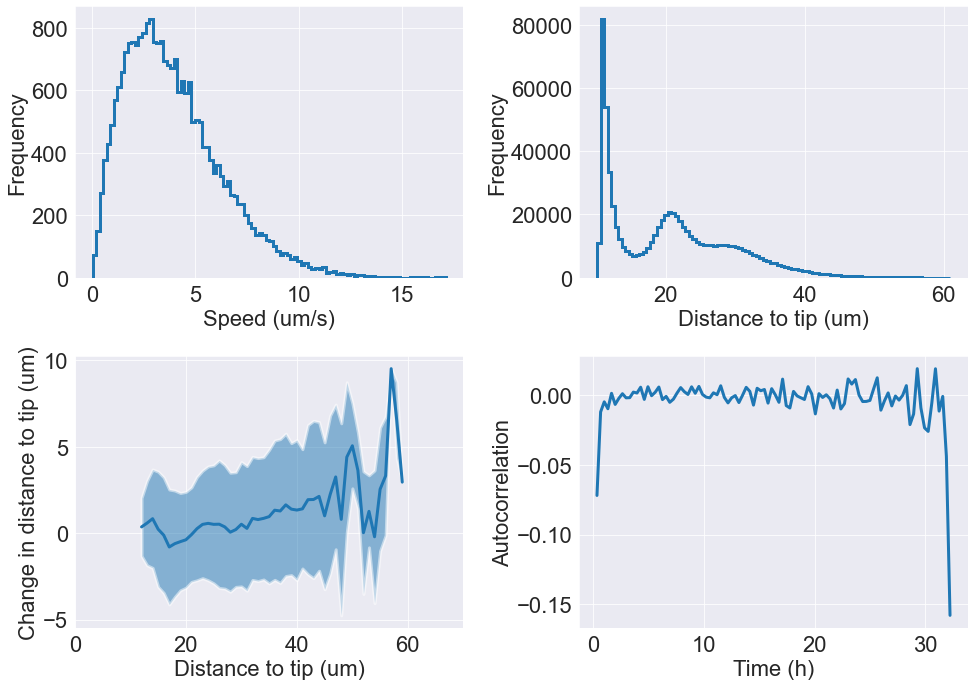

In [19]:
# uec_chemo_str_lst = [0.05, 0.1, 0.2, 0.5]
# mpc_noise_lst     = [0.05, 0.1, 0.2, 0.5]

# for uec_str in uec_chemo_str_lst:
#     for mpc_str in mpc_noise_lst:
#         folder = f"new_data/UEC_noise_grid/uec{uec_str}_mpc{mpc_str}"
#         save_folder = f"UEC_noise_plots_w_iREC/uec{uec_str}_mpc{mpc_str}"
#         fig, ax = make_plots(folder, include_iREC=False, save_folder=save_folder)

folder = "new_data/diff_coef_grid/diff_coef3"
save_folder = "new_data/diff_coef_grid"

fig, ax = make_plots(folder, include_iREC=False, save_folder=save_folder)

In [29]:
folder = "new_data/testing_loose_bounds_tot/testing_loose_bounds_14"
data = np.load(folder + "/data.npy", allow_pickle=True)

# with open(folder + "/sim_dict.json","r") as file:
#     sim_dict = json.load(file)
yield_interval = 50
p_mask_lst, x_lst, p_lst, q_lst = data


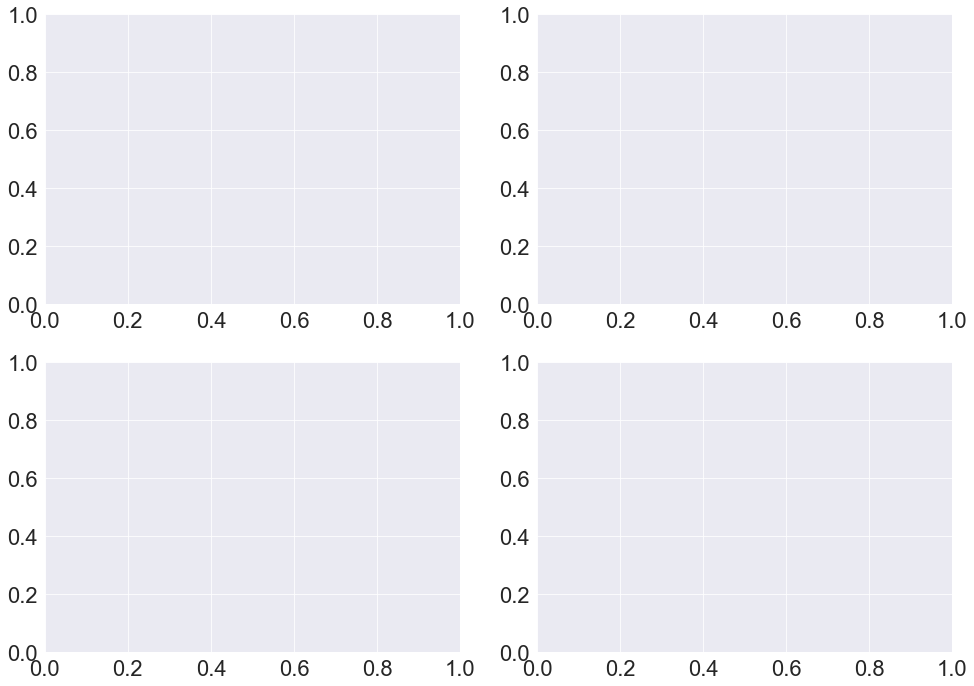

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10), tight_layout=True)
ax = ax.flatten();

Yieldsteps till s-shape : 1027
Timestep till s-shape   : 51350
Timestep time           : 1.68s
Yieldstep time          : 84.13s
Sampling rate           : 14


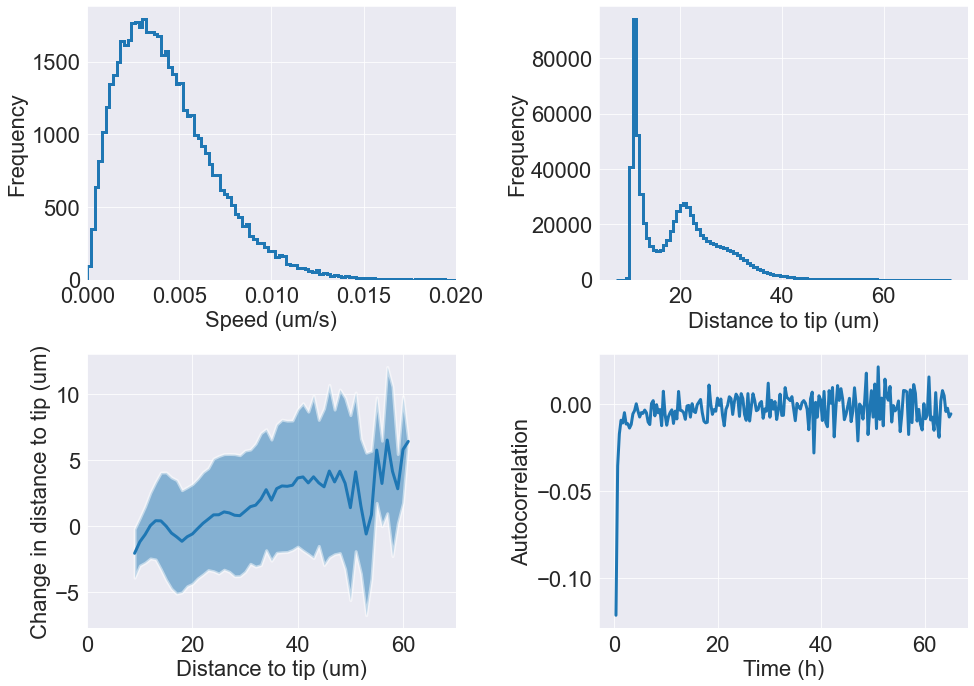

In [31]:
p_mask_lst_lst = make_p_mask_lst_lst(p_mask_lst)
pos_lst_lst = make_cell_pos_lst_lst(x_lst)
mcap_lst = filter_mesenchyme(p_mask_lst_lst, pos_lst_lst)
s_pr_yield, sampling_rate = find_timescale(p_mask_lst, iREC_threshold=0, yield_interval=yield_interval)
speed_lst = make_speed_plot(mcap_lst, s_pr_yield, sampling_rate=sampling_rate, ax=ax[0])
dist_lst = make_dist_to_tip_plot(mcap_lst, p_mask_lst, x_lst, ax=ax[1])
dist_lst, timestep_dist_lst = make_attr_repu_plot(mcap_lst, p_mask_lst, x_lst, sampling_rate=sampling_rate, ax=ax[2])
auto_corr_lst = make_autocorr_lst(mcap_lst, s_pr_yield, sampling_rate=sampling_rate, ax=ax[3])
fig

In [88]:
init_x = x_lst[1]
tip_particles = init_x[p_mask_lst[1] == 9]
mcap_part_pos = mcap_lst[0]

#tip_particles mcap_part_pos distances
dists = (tip_particles[:,None] - mcap_part_pos[None])
dists = np.linalg.norm(dists, axis=2)
dists = np.min(dists, axis=0)
dists.shape

# np.linalg.norm(tip_particles[:,None] - mcap_part_pos[None], axis=2)

(3001,)

In [65]:
mcap_lst[5]

array([[-4.4712615 ,  0.05162683,  2.1808577 ],
       [-4.2841005 ,  0.8087265 ,  2.2318015 ],
       [-3.7697437 ,  0.74109864,  2.320818  ],
       [-3.7977273 ,  0.23251668,  2.7128081 ],
       [-4.177732  ,  0.07967259,  2.5967007 ],
       [-4.099392  ,  0.18033046,  2.7384186 ],
       [-4.410023  , -0.26513523,  2.924307  ],
       [-4.453373  , -0.3044202 ,  2.7378232 ],
       [-4.279169  ,  0.07806255,  2.2497394 ],
       [-4.193617  ,  1.1051282 ,  2.5974927 ],
       [-4.281789  ,  1.3625276 ,  2.361671  ],
       [-4.4210176 ,  1.3217758 ,  2.5158885 ],
       [-4.673051  ,  1.334917  ,  2.9075608 ]], dtype=float32)

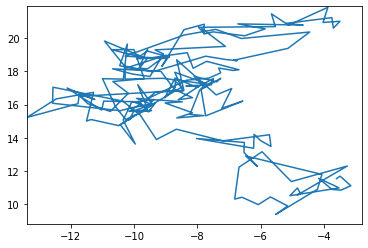

In [67]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
cell_number = 10


fig, ax = plt.subplots()
x_data, y_data = [], []
ln, = plt.plot([], [], animated=True)

def init():
    ax.set_xlim(mcap_lst[cell_number][:,1].min(),mcap_lst[cell_number][:,1].max())
    ax.set_ylim(mcap_lst[cell_number][:,2].min(),mcap_lst[cell_number][:,2].max())
    return ln,

def update(frame):
    x_data.append(mcap_lst[cell_number][frame * 15,1])
    y_data.append(mcap_lst[cell_number][frame * 15,2])
    ln.set_data(x_data, y_data)
    return ln,

ani = FuncAnimation(fig, update, frames=range(0, mcap_lst[cell_number].shape[0]//15, 1)
                    ,init_func=init, blit=True, interval=200)    

HTML(ani.to_html5_video())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)

plt.show()

In [58]:
auto_corr_lst = make_autocorr_lst(mcap_lst, s_pr_yield)

Text(0, 0.5, 'Autocorrelation')

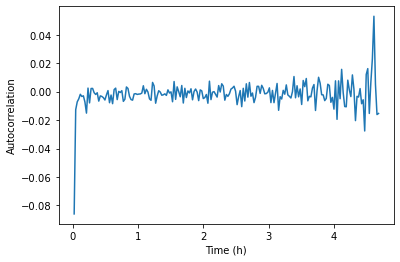

In [60]:
plot_auto_lst = []
for i in range(len(auto_corr_lst)):
    plot_auto_lst.append(auto_corr_lst[i].mean())

lags = np.arange(1,200,1) * s_pr_yield / 3600
plt.plot(lags, plot_auto_lst)
plt.xlabel("Time (h)")
plt.ylabel("Autocorrelation")
# plt.xlim(0, 2)    

In [2]:
folder = "data/vivo_smaller_start3/data.npy"
data = np.load(folder, allow_pickle=True)


In [3]:
init_p_mask = data[0][0]
msc_idx = np.argwhere(init_p_mask == 0)[:,0]
uec_idx = np.argwhere(init_p_mask == 1)[:,0]
msc_pos_lst = [data[1][i][msc_idx][None] for i in range(len(data[1]))]
msc_mask_lst = [data[0][i][msc_idx] for i in range(len(data[0]))] 
uec_pos_lst = [data[1][i][uec_idx][None] for i in range(len(data[1]))]
uec_pos_lst = np.concatenate(uec_pos_lst, axis=0)

msc_mask_lst = np.stack(msc_mask_lst, axis=0)
msc_mask = msc_mask_lst.sum(axis=0) == 0
# msc_mask = msc_mask.astype(int)
msc_pos_lst = np.concatenate(msc_pos_lst, axis=0)
msc_pos_lst = [msc_pos[msc_mask] for msc_pos in msc_pos_lst]
msc_pos_lst = np.stack(msc_pos_lst, axis=0)

In [4]:
msc_dists = np.linalg.norm(msc_pos_lst[1:] - msc_pos_lst[:-1],axis=2)

In [ ]:
plt.hist((msc_dists.flatten() * 5) / 75, bins=100, histtype='step')
plt.xlabel("Speed (um/s)")
plt.ylabel("Frequency");

In [8]:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

In [9]:
msc_vel_lst = (msc_pos_lst[1:] - msc_pos_lst[:-1]) * 5 / 75
msc_vel_lst_reshaped = msc_vel_lst.reshape(2000, msc_vel_lst.shape[1] * msc_vel_lst.shape[2])
auto_corr_lst = []
l = np.arange(20,2000,20)

for i in range(msc_vel_lst_reshaped.shape[1]):
    auto_corr_lst.append(autocorr1(msc_vel_lst_reshaped[:,i],l))

In [ ]:
auto_corr_lst = np.array(auto_corr_lst)
auto_corr_mean = auto_corr_lst.mean(axis=0)
auto_corr_std = auto_corr_lst.std(axis=0)

plt.plot(l*75/3600, auto_corr_mean)
plt.fill_between(l*75/3600, auto_corr_mean - auto_corr_std, auto_corr_mean + auto_corr_std, alpha=0.2)
plt.xlabel("Time (h)");
plt.ylabel("Autocorrelation")
plt.xlim(0,10);


In [ ]:
uec_lst.shape

In [ ]:
#distance from every msc to every uec

msc_uec_dists = np.linalg.norm(msc_pos_lst[:,None] - uec_pos_lst[None], axis=2)

In [114]:
arr = msc_pos_lst[:,:,None] - uec_pos_lst[:,None,:]

In [116]:
arr_dists = np.linalg.norm(arr, axis=3)

In [121]:
min_arr_dists = np.min(arr_dists, axis=2)

In [ ]:
plt.hist((min_arr_dists[1750:]*5).flatten(), bins=100, histtype='step');
plt.xlabel("Distance (um)")
plt.ylabel("Frequency");

In [142]:
min_arr_dists_diffs = min_arr_dists[1:] - min_arr_dists[:-1]

In [ ]:
min_arr_dists[:-1][:,5].shape

In [ ]:
x = min_arr_dists[:-1]*5
mi, ma = np.min(x), np.max(x)
bins = np.linspace(mi, ma, 100)

x = x.flatten()
y = -min_arr_dists_diffs.flatten()

print(x.shape, y.shape)
avgs = [y[(x>=bins[i]) * (x<bins[i+1])].mean() for i in range(len(bins) -1)]

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(min_arr_dists[:-1]*5, -min_arr_dists_diffs, '.', alpha=0.1);
plt.plot(bins[:-1], avgs, linewidth=3);

In [ ]:
plt.plot(min_arr_dists[:-1]*5, -min_arr_dists_diffs[:,5], '.', alpha=0.1);

In [37]:
folder = "data/shenron/data.npy"
data = np.load(folder, allow_pickle=True)
_, x, _, _ = data

In [38]:
combined_x_10 = np.concatenate(x[::10], axis=0)
len_lst_10 = [len(i) for i in x[::10]]  

In [39]:
with open('shenron_1000.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(len_lst_10)
    for i in range(len(combined_x_10)):
        writer.writerow(combined_x_10[i])

In [ ]:
data = np.load('data/aug_cube_bound_tests/data4.npy', allow_pickle=True)
end_data = (data[0][-1], data[1][-1], data[2][-1], data[3][-1])
p_mask, x, p, q = end_data
print(np.sum(p_mask==4))

In [ ]:
data = np.load('data/primed_MPC_0/data.npy', allow_pickle=True)


for i in range(len(data[0])):
    print(data[0][0] == data[0][i])

In [2]:
def make_iREC_evolution(time_arr, lambdas, dt, vesicle_alpha, tube_alpha, device='cpu'):

    #number of timesteps for each phase
    i_pref_time     = int(time_arr[0] / dt)
    pref_time       = int(time_arr[1] / dt)
    i_ves_time      = int(time_arr[2] / dt)
    ves_time        = int(time_arr[3] /dt)
    i_tube_time     = int(time_arr[4] /dt)
    tot_time        = int((np.array(time_arr) / 0.2).sum())

    non_polar_ipref = torch.linspace(lambdas[0][0], 1, i_pref_time, device=device)
    non_polar_pref  = torch.ones(pref_time, device=device)
    non_polar_ives= torch.linspace(1,0,i_ves_time, device=device)
    non_polar_rest  = torch.zeros(ves_time + i_tube_time, device=device)
    non_polar_part  = torch.cat((non_polar_ipref, non_polar_pref, non_polar_ives, non_polar_rest), axis=0)
    non_polar_part = non_polar_part.to(device)

    polar_end_vals  = lambdas[4][1:]
    polar_ipref     = torch.zeros((i_pref_time + pref_time,3), device=device)
    polar_ives_part1= torch.linspace(0,1, i_ves_time, device=device)
    polar_ives      = torch.zeros((i_ves_time, 3), device=device)
    polar_ives[:,0] = polar_ives_part1
    polar_ves       = torch.zeros((ves_time, 3), device=device)
    polar_ves[:,0]  = torch.ones(ves_time, device=device)
    polar_itube     = torch.linspace(0,1, i_tube_time, device=device)
    polar_itube     = polar_end_vals[None:,] * polar_itube[:,None]
    polar_itube[:,0]= torch.linspace(1.0,polar_end_vals[0], i_tube_time, device=device)
    polar_part      = torch.cat((polar_ipref, polar_ives, polar_ves, polar_itube) , axis=0)
    polar_part = polar_part.to(device)

    total = torch.cat((non_polar_part[:,None],polar_part), axis=1)

    alpha_pref_ipref= torch.zeros(i_pref_time + pref_time, device=device)
    alpha_ives      = torch.ones(i_ves_time, device=device) * vesicle_alpha
    alpha_ves       = torch.ones(ves_time, device=device) * vesicle_alpha
    alpha_itube     = torch.linspace(vesicle_alpha, tube_alpha, i_tube_time, device=device)
    alpha_total     = torch.cat((alpha_pref_ipref, alpha_ives, alpha_ves, alpha_itube))
    
    return total, alpha_total, tot_time, torch.tensor([i_pref_time, pref_time, i_ves_time, ves_time, i_tube_time], device=device, dtype=torch.int)


In [8]:
time_arr = torch.tensor([500, 500, 1000, 1000, 500])
lambda_arr = torch.tensor([ [0.3, 0, 0, 0],
                            [0, 0.5, 0.48, 0.02],
                            [0.3, 0, 0, 0],
                            [0, 0.5, 0.42, 0.08],
                            [0, 0.5, 0.42, 0.08]])
dt = 0.2
vesicle_alpha = 0.3
tube_alpha    = 0.5

total_evo, total_alpha_evo, _, _ = make_iREC_evolution(time_arr, lambda_arr, dt, vesicle_alpha, tube_alpha)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(total_evo.shape[0]) * dt, total_evo[:,0], label='non-polar attraction: $\lambda_0$', linewidth=5)
ax.plot(np.arange(total_evo.shape[0]) * dt, total_evo[:,1:].sum(axis=1), label='polar attraction: sum($\lambda_1, \lambda_2, \lambda_3$)', linewidth=5)
ax.set_xlabel('Simulation time from activation of mesenchyme cell', fontsize=15)
ax.set_ylabel('$\lambda$ value', fontsize=15)
ax.axhspan(0, 1, 0.31, 0.96, facecolor='green', alpha=0.2, label='NC interactions strength of 1')
ax.legend(fontsize=15)
sns.despine()
plt.show()

In [ ]:
total_evo[0]

In [ ]:
mat = np.array([[1,2,3],[4,5,6],[7,8,9]])

vecs = np.arange(30).reshape(10,3)

new_mat = mat[None,:,:].repeat(len(vecs),axis=0)

(new_mat @ vecs[:,:,None]).squeeze()

In [ ]:
tens = torch.arange(1,10) * 1000

torch.min(tens).item()

In [ ]:
x_min = 1
x_max = 11

np.linspace(x_min, x_max, 5)


In [ ]:
tens1 = torch.tensor([[1,2,3],[4,5,6],[1,0,1]])
tens2 = torch.tensor([1,2,3])[None].expand(*tens1.shape)
torch.cross(tens1, tens2, dim=1)

In [10]:
def make_random_sphere(N, non_polar_frac , radius=35):
    x = np.random.randn(N, 3)
    r = radius * np.random.rand(N)**(1/3.)
    x /= np.sqrt(np.sum(x**2, axis=1))[:, None]
    x *= r[:, None]

    p = np.random.randn(N, 3)
    p /= np.sqrt(np.sum(p**2, axis=1))[:,None]
    q = np.random.randn(N, 3)
    q /= np.sqrt(np.sum(p**2, axis=1))[:,None]

    mask = np.random.choice([0,1], p=[non_polar_frac, 1-non_polar_frac], size=N)        #Mask detailing which particles are non polar
    p[mask == 0] = np.array([0,0,0])                                                    #Setting the polarities of the non-polarized particles to 0
    q[mask == 0] = np.array([0,0,0])

    sphere_data = (mask, x, p, q)
    return sphere_data

In [42]:
def make_2_spheres(N, x_trans=30, radius=1, include_non_polar=False):

    p_mask1, x1, p1, q1 = make_random_sphere(N//2, 0, radius=radius)
    x2 = x1 + np.array([x_trans, 0,  0])

    x       = np.concatenate((x1, x2), axis=0)
    p_mask  = p_mask1.repeat(2, axis=0) 
    p       = p1.repeat(2, axis=0) 
    q       = q1.repeat(2, axis=0) 
    
    if include_non_polar:
        p_mask_np, x_np, p_np, q_np = make_random_sphere(N*5, 1, radius=x_trans*0.8)
        x_np = x_np + np.array([x_trans/2, 0, 0])
        
        p_mask = np.concatenate((p_mask, p_mask_np), axis=0)
        x = np.concatenate((x, x_np), axis=0)
        p = np.concatenate((p, p_np), axis=0)
        q = np.concatenate((q, q_np), axis=0)


    data = (p_mask, x, p, q)

    return data

In [43]:
data = make_2_spheres(200, include_non_polar=True)

save(data, 'two_sphere_test1', 'testing_two_spheres')

In [5]:
conc_lst = np.linspace(0.5, 0.99, 20)
conc = conc_lst[-1]
folder = f"data/vitro_gradves_grid/conc_{conc:.2f}/data.npy" 
data = np.load(folder, allow_pickle=True)
p_mask_lst, x_lst, _, _ = data

In [ ]:
for i in range(len(p_mask_lst)):
    print(np.sum(p_mask_lst[i] ==0))

In [ ]:
folder = "data/percolation_plot/conc_0.8/data.npy"
data = np.load(folder, allow_pickle=True)

timestep = 25
p_mask  = data[0][timestep]
x       = data[1][timestep]
p_mask = torch.tensor(p_mask, device='cuda')
z_mask, adj_arr = get_adj_lst(x, p_mask)

def get_edge_lst_cuda(adj_arr, z_mask, p_mask):
    adj_arr[z_mask == 0] = -1
    polar_idx = torch.argwhere(p_mask == 1).squeeze()
    non_polar_mask = torch.any(adj_arr[:,:,None] == polar_idx, dim=2)
    double_mask = non_polar_mask * z_mask

    masked_adj_arr = adj_arr * double_mask
    edge_lst = torch.cat((adj_arr[:,0][:,None].expand((adj_arr.shape[0], adj_arr.shape[1])).reshape(-1,1) , masked_adj_arr.reshape(-1,1)), dim=1) 
    edge_lst = edge_lst[edge_lst[:,1] != 0]

    return edge_lst
    
    

In [60]:
# Testing cpu vs gpu
cpu_lst = []

for i in range(10):
    t = time()
    # CPU
    p_mask_cpu  = p_mask.detach().cpu().numpy()
    z_mask_cpu  = z_mask.detach().cpu().numpy()
    adj_arr_cpu = adj_arr.detach().cpu().numpy()
    edge_lst    = fix_polar_adj_arr(adj_arr=adj_arr_cpu, p_mask=p_mask_cpu,z_mask=z_mask_cpu)
    edge_lst    = get_edge_lst(adj_arr_cpu)
    graph       = make_graph(edge_lst)

    cpu_lst.append(time() - t)

gpu_lst = []
for i in range(10):
    t = time()
    edge_lst    = get_edge_lst_cuda(adj_arr, z_mask=z_mask, p_mask=p_mask)
    graph       = make_graph(edge_lst.detach().cpu().numpy())

    gpu_lst.append(time() - t)

In [59]:
edge_lst    = get_edge_lst_cuda(adj_arr, z_mask=z_mask, p_mask=p_mask)
gpu_graph       = make_graph(edge_lst.detach().cpu().numpy())

p_mask_cpu      = p_mask.detach().cpu().numpy()
z_mask_cpu      = z_mask.detach().cpu().numpy()
adj_arr_cpu     = adj_arr.detach().cpu().numpy()
adj_arr_cpu     = fix_polar_adj_arr(adj_arr=adj_arr_cpu, p_mask=p_mask_cpu,z_mask=z_mask_cpu)
edge_lst        = get_edge_lst(adj_arr_cpu)
cpu_graph       = make_graph(edge_lst)


In [53]:
cpu_lst = []
for  comp in nx.connected_components(cpu_graph):
    cpu_lst.append(len(comp))

gpu_lst = []
for  comp in nx.connected_components(gpu_graph):
    gpu_lst.append(len(comp))


In [ ]:
np.array(cpu_lst) == np.array(gpu_lst)

In [ ]:
len(cpu_graph.nodes)
len(gpu_graph.nodes)

In [ ]:
lst = np.array(lst)

np.sum(lst == -1)

In [ ]:
(sum(cpu_lst) - sum(gpu_lst)) / sum(cpu_lst)

In [98]:
from torch_geometric.data import Data
from torch_geometric.utils import remove_self_loops

edge_lst = get_edge_lst_cuda(adj_arr, z_mask, p_mask)

edge_lst_no_self_loops, _ = remove_self_loops(edge_lst.T)

graph = Data(edge_index=edge_lst_no_self_loops, num_nodes = len(adj_arr))



In [ ]:
def make_graph(edge_lst):
    G = nx.from_edgelist(edge_lst)
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

make_graph(edge_lst)

In [132]:
    G = make_graph(edge_lst.detach().cpu().numpy())
    G.remove_edges_from(nx.selfloop_edges(G))


In [ ]:
edge_lst

In [9]:
folder = "data/percolation_plot/conc_0.8/data.npy"
data = np.load(folder, allow_pickle=True)

timestep = -1
p_mask  = data[0][timestep]
x       = data[1][timestep]
p_mask = p_mask
z_mask, adj_arr = get_adj_lst(x, p_mask)

p_mask = p_mask
z_mask = z_mask.detach().cpu().numpy()
adj_arr = adj_arr.detach().cpu().numpy()

adj_lst     = fix_polar_adj_arr(adj_arr, p_mask, z_mask )
edge_lst_cpu    = make_edge_lst(adj_lst)
graph       = make_graph(edge_lst)
egde_lst_cpu = torch.tensor(edge_lst_cpu, device='cuda')


In [29]:
def torch_intersect(a, b):
 intersection = a[(a.view(1, -1) == b.view(-1, 1)).any(dim=0)]
 return intersection

def torch_intersect2(a, b):
    # a = a.unique()
    # b = b.unique()
    a_cat_b, counts = torch.cat([a, b]).unique(return_counts=True)
    intersection = a_cat_b[torch.where(counts.gt(1))]
    return intersection

def fix_polar_adj_arr(adj_arr, p_mask, z_mask):
    adj_arr[z_mask == 0] = -1
    polar_idx = np.argwhere(p_mask == 1).squeeze()
    adj_lst = [] 
    for sub_arr in adj_arr:
        polar_neighbors = list(np.intersect1d(sub_arr,polar_idx))
        adj_lst.append(polar_neighbors)
    return adj_lst

def fix_polar_arr_2(adj_arr, p_mask, z_mask):
    adj_arr[z_mask == 0] = -1
    polar_idx = np.argwhere(p_mask == 1).squeeze()
    

def fix_polar_adj_arr_cuda(adj_arr, p_mask, z_mask):
    adj_arr[z_mask == 0] = -1
    polar_idx = torch.argwhere(p_mask == 1).squeeze()
    adj_lst = [] 
    for sub_arr in adj_arr:
        polar_neighbors = list(torch_intersect2(sub_arr,polar_idx))
        adj_lst.append(polar_neighbors)
    return adj_lst

def get_edge_lst(adj_arr):
    edge_lst = []
    for sub_arr in adj_arr:
        for entry in sub_arr:
            edge_lst.append((sub_arr[0],entry))
    return edge_lst

def make_graph(edge_lst):
    G = nx.from_edgelist(edge_lst)
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

def get_adj_lst(x, p_mask=None, seethru=0, k=50):
    d, idx = find_potential_neighbours(x, k=k)
    idx = torch.tensor(idx, dtype=torch.long, device=device)
    d = torch.tensor(d, dtype=torch.float, device=device)
    x = torch.tensor(x, dtype=torch.float, device=device)
    p_mask = torch.tensor(p_mask, dtype=torch.int, device=device)

    full_n_list = x[idx]
    dx = x[:, None, :] - full_n_list
    z_mask = find_true_neighbours(d, dx, seethru=seethru)

    sort_idx = torch.argsort(z_mask.int(), dim=1, descending=True)
    z_mask = torch.gather(z_mask, 1, sort_idx)
    idx = torch.gather(idx, 1, sort_idx)
    m = torch.max(torch.sum(z_mask, dim=1)) + 1
    z_mask = z_mask[:, :m]
    idx = idx[:, :m]

    polar_idx       = idx[p_mask == 1]
    return z_mask[p_mask == 1], polar_idx #.detach().to("cpu").numpy(),


# min_ves_time_bool = tstep > (self.pre_polar_dur + self.warmup_dur + self.min_ves_time)
# if self.update_neighbors_bool(tstep, division) and (self.vesicle_formation == True and min_ves_time_bool):

#     # Append the name of the nodes themselves
#     extended_idx    = torch.cat( (torch.arange(len(idx), device=self.device)[:,None] , idx ), dim=1) #CANNOT BE CHANGED
#     extended_z_mask = torch.cat( (torch.ones(len(idx), device=self.device)[:,None] , z_mask ), dim=1) #CANNOT BE CHANGED

#     # Transition to cpu
#     polar_idx   = extended_idx[p_mask != 0].detach().to("cpu").numpy()
#     polar_z_mask= extended_z_mask[p_mask != 0].detach().to("cpu").numpy()
    
    # Find graph structure of polar particles
    temp_p_mask = torch.where(p_mask == 2, 1, p_mask)
    adj_lst     = fix_polar_adj_arr(polar_idx, temp_p_mask.detach().to("cpu").numpy(), polar_z_mask )
    edge_lst    = make_edge_lst(adj_lst)
    graph       = make_graph(edge_lst)

    # Find sizes of connected components
    # If connected component size > threshold --> p_mask = 2 --> Tube
    for comp in nx.connected_components(graph):
        if len(comp) > self.crit_ves_size:
            p_mask[list(comp)] = 2
            self.beta[list(comp)] = self.polar_prolif_rate

In [13]:
folder = "data/percolation_plot/conc_0.8/data.npy"
data = np.load(folder, allow_pickle=True)

timestep = 25
p_mask  = data[0][timestep]
x       = data[1][timestep]

In [18]:
z_mask, polar_adj_arr = adj_lst(x, p_mask, seethru=0)
n_polar_particles = polar_adj_arr.shape[0]
polar_adj_arr = fix_polar_adj_arr(polar_adj_arr, p_mask, z_mask)
edge_lst = make_edge_lst(polar_adj_arr)
graph = make_graph(edge_lst)

In [ ]:
import numpy as np
import scipy.sparse as sp

assert data.edge_index is not None

adj = to_scipy_sparse_matrix(data.edge_index, num_nodes=data.num_nodes)

num_components, component = sp.csgraph.connected_components(
    adj, connection=self.connection)

In [ ]:
def get_components(self, data: Data) -> Data:
    import numpy as np
    import scipy.sparse as sp

    assert data.edge_index is not None

    adj = to_scipy_sparse_matrix(data.edge_index, num_nodes=data.num_nodes)

    num_components, component = sp.csgraph.connected_components(
        adj, connection=self.connection)

_, count = np.unique(component, return_counts=True)
subset_np = np.in1d(component, count.argsort()[-self.num_components:])
subset = torch.from_numpy(subset_np)
subset = subset.to(data.edge_index.device, torch.bool)

return data.subgraph(subset)

In [ ]:
arr = np.arange(8_000)

for comp in nx.connected_components(graph):
    if len(comp) > 10:
        print(comp)
        print(arr[list(comp)])

In [ ]:
tens = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
torch.cat((torch.arange(3)[:,None], tens), dim=1)

In [ ]:
data1 = np.load('data/vitro_tests/cell_wall_eq_old/data.npy', allow_pickle=True)
data2 = np.load('data/vitro_tests/cell_wall_eq_change_test/data.npy', allow_pickle=True)
timestep = 50

x1 = data1[1][timestep]
x2 = data2[1][timestep]

In [ ]:
len(([1,2,3],(2,3),4,5,6))

In [1]:
sph1_bound_loc  = [0,0,0]
sph1_radius     = 10

sph2_bound_loc  = [9,0,0]
sph2_radius     = 5

bound_str = 0.1

def sphere_bound(x):
    bound1_dists= torch.sqrt(torch.sum((sph1_bound_loc -  x)**2, dim=1))
    bound2_dists= torch.sqrt(torch.sum((sph2_bound_loc -  x)**2, dim=1))
    v_add1      = torch.where(bound1_dists > sph1_radius, 1/2 * bound_str * (bound1_dists - sph1_radius)**2, 0.0)
    v_add2      = torch.where(bound2_dists > sph2_radius, 1/2 * bound_str * (bound2_dists - sph2_radius)**2, 0.0)
    v_add = torch.min(v_add1, v_add2)

    v_add = torch.sum(v_add)

    return v_add

In [ ]:
mask = torch.tensor([1,0,1], dtype=torch.bool)

tens1 = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
tens2 = torch.tensor([-1,-1,-1])

torch.where(mask[:,None], tens1, tens2)
torch.any(tens1[None], dim=0)

In [ ]:
mask1 = torch.tensor([1,0,1,1,0,0,0,1], dtype=torch.bool)
mask2 = torch.tensor([0,0,1,1,0,0,0,0], dtype=torch.bool)

mask3 = torch.logical_or(mask1, mask2)
mask1[mask2] = 0


print(mask1)
print(mask3)

In [ ]:
tens1 = torch.tensor([1,0,0,0])
tens2 = torch.tensor([0,1,0,0])

torch.where(torch.tensor([1,1,1,0,0,0,1,0], dtype=torch.bool)[:,None], tens1, tens2)

In [ ]:
tens = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
mask = torch.tensor([[1,0,1],[0,1,0],[1,0,1]], dtype=torch.bool)

mask >0

In [ ]:
tens1    = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
# tens2   = torch.tensor([[[1,1,1],[2,2,2],[3,3,3],[4,4,4]],[[1,1,1],[2,2,2],[3,3,3],[4,4,4]],[[1,1,1],[2,2,2],[3,3,3],[4,4,4]]])
tens1[:,:,None].expand(3,3,5)

In [88]:
data = np.load('data/testing_comma2/data.npy', allow_pickle=True)
mask = data[0]
x = data[1]

In [83]:
def group_mean(myArray, N=2):
    result = np.cumsum(myArray)[N-1::N]/float(N)
    result[1:] = result[1:] - result[:-1]
    return result

In [84]:
def get_activation_times(mask, N_mean = None):
    mask = np.vstack(mask)
    activation_arr = np.sum((mask[:-1] - mask[1:]) == -3, axis=1)
    if N_mean:
        activation_arr = group_mean(activation_arr, N_mean)
    return activation_arr

In [85]:
def plot_activation_times(activations, dt, N_mean=None, ax=None):
    if not ax:
        fig, ax = plt.subplots()
    activations = np.roll(np.append(activations , activations[0]), 1)
    time = np.arange(0,len(activations)) * dt
    if N_mean:
        time *= N_mean
    ax.step(time, activations)
    return ax

In [ ]:
act = get_activation_times(mask, N_mean=100)
plot_activation_times(act, 0.2, N_mean=100)

In [125]:
source_pos = np.array([0,0,5])

def endpos_vs_activation(mask, x, source, dt):
    mask = np.vstack(mask)
    activation_arr = (mask[:-1] - mask[1:]) == -3
    x_end = x[-1]

    ind = []
    times = []
    for i in range(activation_arr.shape[0]):
        indices = np.argwhere(activation_arr[i])
        if np.any(indices):
            ind.append(indices)
            times += [i*dt]*len(indices)
    ind = np.concatenate(ind).squeeze()
    end_pos = x_end[ind]
    dist_from_source =  np.sum(np.abs(source - end_pos), axis=1)
    times = np.array(times)
    return dist_from_source, times

In [ ]:
dists, times = endpos_vs_activation(mask, x, source_pos, dt=0.2)
# print(dists)
plt.plot(times, dists,'.')

In [ ]:
test_arr = np.array([1,2,3,4,5,6,7,8,9,10])
groupedAvg(test_arr)

In [65]:
activation_arr = np.sum((mask[:-1] - mask[1:]) == -3, axis=1)
meaned_arr = groupedAvg(activation_arr,N=25)

In [ ]:
time_arr = np.arange(1,len(meaned_arr)+1) * 0.2 * 25
plt.step(time_arr, meaned_arr)

In [3]:
import numpy as np
import pickle
data = np.load('data/ubud_w_mcap/data.npy', allow_pickle=True)
data = (data[0][-1], data[1][-1], data[2][-1], data[3][-1])

def save(data_tuple, name, output_folder):
    with open(f'{output_folder}/{name}.npy', 'wb') as f:
        pickle.dump(data_tuple, f)

save(data, 'ubud_mcap_final.npy', 'data')


In [ ]:
p_mask = torch.tensor([1,1,1,2,2,5,1,2,1,2])
x      = torch.arange(len(p_mask) * 3).reshape(-1,3)

x[torch.logical_or(p_mask == 1, p_mask == 5)]

In [9]:
p_mask = torch.tensor([1,2,2,3,1,1,2,2,3,3])
idx = torch.tensor([[1,2,3],[2,3,4],[3,4,5],[5,6,7],[1,2,3],[0,9,1],[1,4,5],[0,2,6],[8,9,3],[1,4,8]])

interaction_mask = torch.cat((p_mask[:,None].expand(p_mask.shape[0], idx.shape[1])[:,:,None], p_mask[idx][:,:,None]), dim=2)

In [ ]:
p_mask[torch.logical_and(interaction_mask == torch.tensor([1,1]),axis=2)]

In [ ]:
tens = torch.tensor([1,2,3,4,5,6,1,2,3,4,5,6])

tens[tens < 3][tens[tens<3] == 1] = 0

tens[tens<3][tens[tens<3] == 1] = 0
tens[torch.logical_and(tens < 3, tens == 1)] = 0
tens

In [ ]:
tens = torch.tensor([[1,2,4,5,4],[1,4,5,2,1],[1,2,5,2,5],[3,1,3,0,4]])

torch.logical_or(tens == 1, tens == 5)

In [ ]:
tens = torch.tensor([[1,2,3],[0,0,6],[0,0,0],[0,0,0]])

tens[torch.sum(tens, dim=1) == 0] = torch.tensor([1,1,2])

tens


In [24]:
import os

folder = "data/testing_cylinder_cross_1/data.npy"

data = np.load(folder, allow_pickle=True)

mask, x, p, q = data

mask    = mask[-1]
x       = x[-1]
p       = p[-1]
q       = q[-1]

x[:,2] -= 0.45 * 75
x[:,1] += 0.35 * 75

# mask.shape
# os.mkdir('data/u_bud')

# np.save('data/u_bud/data.npy', ([mask], [x], [p], [q]), allow_pickle=True)

with open(f'data/u_bud/data.npy', 'wb') as f:
    pickle.dump(([mask], [x], [p], [q]), f)

In [ ]:
folder = "data/u_bud/data.npy"
data = np.load('data/u_bud/data.npy', allow_pickle=True)

data[1]

In [20]:
index = 0

folder = 'percolation_data/conc0.8_0/data.npy'
data = np.load(folder, allow_pickle=True)
p_mask1 = data[0][index]
x1      = data[1][index]
p1      = data[2][index]
q1      = data[3][index]

folder = 'percolation_data/conc0.8_2/data.npy'
data = np.load(folder, allow_pickle=True)
p_mask2 = data[0][index]
x2      = data[1][index]
p2      = data[2][index]
q2      = data[3][index]

In [ ]:
print(x1[0])
print(x2[0])

In [ ]:
folder = 'data/size10000_conc0.8/data.npy'
data = np.load(folder, allow_pickle=True)
p_mask = data[0][-1]
x      = data[1][-1]
p      = data[2][-1]
q      = data[-1][-1]

In [9]:
p_mask = data[0][-1]
x      = data[1][-1]
p      = data[2][-1]
q      = data[3][-1]

In [46]:
def get_percolation(x, p_mask, seethru=0):
    z_mask, polar_adj_arr = adj_lst(x, p_mask, seethru=seethru)
    n_polar_particles = polar_adj_arr.shape[0]
    polar_adj_arr = fix_polar_adj_arr(polar_adj_arr, p_mask, z_mask)
    edge_lst = make_edge_lst(polar_adj_arr)
    graph = nx.from_edgelist(edge_lst)
    max_cluster_size = len(max(nx.connected_components(graph), key=len))
    print(max_cluster_size)
    print(n_polar_particles)
    perc_prob = max_cluster_size / n_polar_particles
    return perc_prob

In [6]:
seethru = 0
z_mask, polar_adj_arr = adj_lst(x, p_mask, seethru=seethru)
n_polar_particles = polar_adj_arr.shape[0]


polar_adj_arr = fix_polar_adj_arr(polar_adj_arr, p_mask, z_mask)
# edge_lst = make_edge_lst(polar_adj_arr)
# graph = nx.from_edgelist(edge_lst)
# max_cluster_size = len(max(nx.connected_components(graph), key=len))
# print(max_cluster_size)
# print(n_polar_particles)
# perc_prob = max_cluster_size / n_polar_particles

In [ ]:
get_percolation(x, p_mask)

In [13]:
def above_threshold(x, p_mask, max_fraction=0.8 , radius=None, k=100):
    if not radius:
        z_mask, idx = adj_lst(x, p_mask, k=k)
        idx = fix_polar_adj_arr(idx, p_mask, z_mask)
        len_lst = [len(x) for x in idx]
        max_neighbors = max(len_lst)
        threshold = max_neighbors * max_fraction
        mask = [neighbors > threshold for neighbors in len_lst]
        return_lst = []
        for i in range(len(mask)):
            if mask[i]:
                return_lst.append(idx[i][0])
        return return_lst

In [ ]:
len(above_threshold(x, p_mask, max_fraction=0.5))

In [ ]:
idx = np.array([1,2,3,4])


In [7]:
folder = 'data/testing_metrics/data.npy'

data = np.load(folder, allow_pickle=True)


In [8]:
p_mask = data[0][-1]
x      = data[1][-1]
q      = data[-1][-1]

In [11]:
branch_particles = get_branching(x, q, p_mask, threshold=0.2)

In [ ]:
u_tens = torch.unique(tensor)
u_tens

In [ ]:
p_mask[:10]

In [ ]:
tens = torch.randn((10000,30))
bool_tens = tens < 0
# bool_tens = bool_tens.dtype(torch.int)

idx = torch.argwhere(bool_tens)
idx

In [ ]:
print(len(x[p_mask==1]))

In [ ]:
_, polar_adj_lst = adj_lst(x, p_mask, seethru=0)

In [ ]:
def fix_polar_adj_arr(adj_arr, p_mask):
    polar_idx = np.argwhere(p_mask == 1).squeeze()
    adj_lst = [] 
    for sub_arr in adj_arr:
        polar_neighbors = list(np.intersect1d(sub_arr,polar_idx))
        adj_lst.append(polar_neighbors)
    return adj_lst

def make_edge_lst(adj_arr):
    edge_lst = []
    for sub_arr in adj_arr:
        for entry in sub_arr[1:]:
            edge_lst.append((sub_arr[0],entry))

    return edge_lst

In [ ]:
edge_lst = fix_polar_adj_arr(polar_adj_lst, p_mask)

In [ ]:
edge_lst = make_edge_lst(edge_lst)
graph = nx.from_edgelist(edge_lst)

In [ ]:
cluster_lst = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)]
sum(cluster_lst)

In [ ]:
sum(cluster_lst)/2

In [ ]:
edgelist = [(0, 1),(1,0),(1,0),(0,1),(0,2),(2,0),(1,0),(1,2),(2,1)]  # single edge (0,1)
G = nx.from_edgelist(edgelist)
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
x, _  = make_blobs(5_000, 2, centers=1, cluster_std=1)
x = x * 10
p_mask = np.ones(5_000)

branch_particles = above_threshold(x, p_mask, max_fraction=1, radius=5)
# branch_particles = np.array(branch_particles, dtype=int)

# display_branches(x, p_mask, branch_particles)

plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1] )
plt.scatter(x[branch_particles][:,0],x[branch_particles][:,1])

In [ ]:
branch_particles

In [ ]:
tens = torch.tensor([[3,1,2],[4,6,5],[9,8,7]])

torch.sort(tens)

In [60]:
def func():
    print('fuck')

In [ ]:
func();

In [1]:
import numpy as np

In [2]:
def get_centers(x, p, q, p_mask, depression=5  ,num=500):    
    x_polar = x[p_mask == 1].copy()
    p_polar = p[p_mask == 1].copy()
    q_polar = q[p_mask == 1].copy()

    p_polar /= np.sqrt(np.sum(p_polar ** 2, axis=1))[:, None]
    q_polar -= q_polar.dot(p_polar) * p_polar
    q_polar /= np.sqrt(np.sum(q_polar ** 2, axis=0))

    lin_trans = np.zeros((len(x_polar), 3, 3))
    lin_trans[:,:,0] = p_polar
    lin_trans[:,:,1] = q_polar
    lin_trans[:,:,2] = np.cross(p_polar,q_polar)

    x_trans = (np.linalg.inv(lin_trans) @ x_polar[:,:,None]).squeeze()

    subtract_arr =  np.zeros_like(x_trans)
    subtract_arr[:,0] = depression

    trans_centers =  x_trans - subtract_arr
    centers = (lin_trans @ trans_centers[:,:,None]).squeeze()
    sampled_centers = centers[:num]

    return sampled_centers

In [166]:
def get_prolif_positions(x, p, q, p_mask):
    x_polar = x[p_mask == 1].copy()
    p_polar = p[p_mask == 1].copy()
    q_polar = q[p_mask == 1].copy()

    p_polar /= torch.sqrt(np.sum(p_polar ** 2, dim=1))[:, None]
    q_polar -= torch.sum(q_polar * p_polar, dim=1)[:,None] * p_polar
    q_polar /= torch.sqrt(torch.sum(q_polar ** 2, dim=0))

    lin_trans = torch.zeros((len(x_polar), 3, 3))
    lin_trans[:,:,0] = p_polar
    lin_trans[:,:,1] = q_polar
    lin_trans[:,:,2] = torch.cross(p_polar,q_polar)

    new_pos = (torch.linalg.inv(lin_trans) @ x_polar[:,:,None]).squeeze()

    add_arr =  torch.zeros_like(new_pos)
    add_arr[:,1:] = torch.random.normal(size=(new_pos.shape[0],new_pos.shape[1]-1))

    new_pos += add_arr
    new_pos = (lin_trans @ new_pos[:,:,None]).squeeze()

    return new_pos


In [ ]:
prolif_scale = 10

x_polar = np.array([[0.,0.,0.]])
p_polar = np.array([[0.,1.,0]])
q_polar = np.array([[1.,0.,0]])

p_polar /= np.sqrt(np.sum(p_polar ** 2, axis=1))[:, None]
q_polar /= np.sqrt(np.sum(q_polar ** 2, axis=1))[:, None]

lin_trans = np.zeros((len(x_polar), 3, 3))
lin_trans[:,:,0] = p_polar
lin_trans[:,:,1] = q_polar
lin_trans[:,:,2] = np.cross(p_polar,q_polar)

x_trans = (lin_trans @ x_polar[:,:,None]).squeeze()
x_trans = x_trans[:,None]

# # subtract_arr =  np.zeros_like(x_trans)
# # subtract_arr[:,1:] = np.random.normal()

x_trans[:,1:] += np.random.normal(scale=prolif_scale, size=(x_trans.shape[0],x_trans.shape[1]))
# new_particle = (np.linalg.inv(lin_trans) @ x_trans[:,:,None]).squeeze()
# new_particle


In [158]:
prolif_scale = 1

x_polar = np.array([0.,0.,0.])
p_polar = np.array([1.,1.,0])
q_polar = np.array([0.,1.,0])

p_polar /= np.sqrt(np.sum(p_polar ** 2, axis=0))
q_polar -= q_polar.dot(p_polar) * p_polar
q_polar /= np.sqrt(np.sum(q_polar ** 2, axis=0))

lin_trans = np.zeros((3, 3))
lin_trans[:,0] = p_polar
lin_trans[:,1] = q_polar
lin_trans[:,2] = np.cross(p_polar,q_polar)

x_trans = (np.linalg.inv(lin_trans) @ x_polar).squeeze()

subtract_arr =  np.zeros((100,x_trans.shape[0]))
subtract_arr[:,1:] = np.random.normal(scale=prolif_scale, size=(100, x_trans.shape[0]-1))

new_particles = x_trans + subtract_arr

new_particles = (lin_trans @ new_particles[:,:,None]).squeeze()

In [ ]:
(new_particles * np.array([1.,1.,0]))

In [ ]:
x_polar = np.array([0.,0.,0.])

lin_trans = np.zeros((3, 3))
lin_trans[:,0] = p_polar
lin_trans[:,1] = q_polar
lin_trans[:,2] = np.cross(p_polar,q_polar)

x_trans = (np.linalg.inv(lin_trans) @ x_polar)
print(x_trans)

x_reversed = lin_trans @ (x_trans + np.array([0,1,1]))
print(x_reversed)

In [ ]:
x_trans[1:] + np.random.normal(scale=prolif_scale, size=(100,x_trans.shape[0]-1))

In [65]:
p_polar = np.array([1.,1.,0])
q_polar = np.array([0.,1.,0])

p_polar /= np.sqrt(np.sum(p_polar ** 2, axis=0))
q_polar /= np.sqrt(np.sum(q_polar ** 2, axis=0))

q_polar -= q_polar.dot(p_polar) * p_polar
q_polar /= np.sqrt(np.sum(q_polar ** 2, axis=0))

In [ ]:
p_polar.dot(q_polar)

In [ ]:
import torch
torch.manual_seed(42)

for i in range(100):
    print(torch.normal(mean = 0, std = 1, size=(1,2)))

In [ ]:
tens = torch.tensor([[1,2,3],[3,4,4]])

tens.numel()

In [ ]:
import torch
torch.manual_seed(42)

In [ ]:
torch.normal(mean = 0, std = 1, size=(1,2))

In [ ]:
import numpy as np

rot_matrix = np.array([[1.0,0.0,0.0],[0.0,0.0, -1],[0,1, 0]])


lin_trans = np.zeros((10, 3, 3))
lin_trans[:,:,0] = 1
lin_trans[:,:,1] = 2
lin_trans[:,:,2] = 3

np.repeat(rot_matrix[None],2,axis=0,)

In [1]:
import numpy as np
import torch
device = 'cuda'

In [11]:
pos = torch.arange(0,30, 1, device=device).reshape(10,3)
mask = torch.tensor(np.random.choice([0,1], 30), device=device)
mask2 = torch.tensor(np.random.choice([0,1], 30))

In [ ]:
lst = list(mask[[0,0,1,2,10,11]])

lst[2]

mask[lst[6]]

In [ ]:
sum(list(torch.zeros(10)))

In [ ]:
x = torch.arange(10)
values = torch.tensor([1,2])
x = x[x! = values[:]]
x

In [38]:
def torch_delete(tensor, indices):
    mask = torch.ones(tensor.numel(), dtype=torch.bool, device=self.device)
    mask[indices] = False
    return tensor[mask]

In [ ]:
th_delete(x,torch.tensor([1,2,3]))

In [ ]:
from time import time_ns

tens = torch.arange(100_000)
lst  = list(np.arange(100_000))

while True:
    lst.pop(0)
    # tens = th_delete(tens, torch.tensor([0]))

In [53]:
lst = [1,2,3,4]

lst = [i + 1 for i in lst]

In [ ]:
lst = [1,2,3,4,5,6,7]
mask_for_lst = [1,1,1,1,0,0,0]

lst[*mask_for_lst]

In [ ]:
[1,2,3,4,5,6,7] > 2

In [ ]:
idx = torch.tensor([1,4,6,9,13,15])
idx_idx = torch.tensor([4,6,9])


idx in idx_idx



In [ ]:
torch.where(idx == idx_idx)

In [ ]:
torch.argwhere(torch.isin(idx, idx_idx))[:,0]

In [23]:
import numpy as np
import torch
t_arr = np.array([100,50,100])
dt = 0.1

def make_iREC_evolution(time_arr, dt):
    i_pref_time     = int(time_arr[0] / dt)
    pref_time       = int(time_arr[1] / dt)
    i_polar_time    = int(time_arr[2] / dt)
    tot_time        = i_pref_time + pref_time + i_polar_time 

    non_polar_ipref = torch.linspace(0.3, 1, i_pref_time)
    non_polar_pref  = torch.ones(pref_time)
    non_polar_ipolar= torch.linspace(1,0,i_polar_time)
    non_polar_part  = torch.cat((non_polar_ipref, non_polar_pref, non_polar_ipolar), axis=0)

    polar_end_vals  = torch.tensor([0.5,0.4,0.1])
    polar_ipref     = torch.zeros((i_pref_time + pref_time,3))
    polar_ipolar    = torch.linspace(0,1, i_polar_time)
    polar_ipolar    = polar_end_vals[None:,] * polar_ipolar[:,None]
    polar_part      = torch.cat((polar_ipref, polar_ipolar),axis=0)

    total = torch.cat((non_polar_part[:,None],polar_part), axis=1)
    return total, tot_time

In [ ]:
make_iREC_evolution(t_arr, dt=0.2)

In [16]:
import numpy as np

polar_end_vals  = np.array([0.5,0.4,0.1])
arr = np.linspace(1,polar_end_vals[0], 100)
# arr2 = (1 - arr)*2
arr2 = np.linspace(0,1,100)
arr3 = polar_end_vals[None:,] * arr2[:,None]
arr3[:,0] = arr

In [ ]:
arr3.sum(axis=1)

In [8]:
i_pref_time     = int(t_arr[0] / dt)
pref_time       = int(t_arr[1] / dt)
i_polar_time    = int(t_arr[2] / dt)

non_polar_ipref = np.linspace(0.3, 1, i_pref_time)
non_polar_pref  = np.ones(pref_time)
non_polar_ipolar= np.linspace(1,0,i_polar_time)
non_polar_part = np.concatenate((non_polar_ipref, non_polar_pref, non_polar_ipolar), axis=0)

polar_end_vals  = np.array([0.5,0.4,0.1])
polar_ipref     = np.zeros((i_pref_time + pref_time,3))
polar_ipolar    = np.linspace(0,1, i_polar_time)
polar_ipolar = polar_end_vals[None:,] * polar_ipolar[:,None]
polar_part  = np.concatenate((polar_ipref, polar_ipolar),axis=0)

In [20]:
total = np.concatenate((non_polar_part[:,None],polar_part), axis=1)

In [53]:
tens1  = torch.arange(0,10)[None,:,None].expand(10,10,3)
tens2 = torch.arange(10,20)[None,:,None].expand(10,10,3)

In [ ]:
torch.min(torch.cat((tens1[:,:,None], tens2[:,:,None]), dim=2), dim=2)[0]

In [ ]:
torch.arange(0,10)[None,:,None]

In [ ]:
torch.minimum(tens1, tens2)

In [72]:
tens1 = torch.ones((100,10,3))
tens2 = torch.zeros((100,10))


In [ ]:
tens1 * tens2[:,:,None].expand(100,10,3)

In [94]:
folder = "data/testing_kidneygen_real/data.npy"
data = np.load(folder, allow_pickle=True)

data = (data[0][-1], data[1][-1], data[2][-1], data[3][-1])

In [ ]:
np.sum(data[0] == 0)

In [ ]:
def func(x):
    a = x
    b = 2*a
    breakpoint()
    return b

func(10)

In [4]:
data = np.load('vitro_tests/standard_run/data.npy', allow_pickle=True)
p_mask_lst , x_lst, p_lst, q_lst = data

p_mask_final = p_mask_lst[-1]
x_final = x_lst[-1]
p_lst_final = p_lst[-1]

polar_x = x_final[p_mask_final == 2]
polar_p = p_lst_final[p_mask_final == 2]

#save data
with open('last_frame_data.npy', 'wb') as f:
    pickle.dump((polar_x, polar_p), f)

In [2]:
data = np.load('vitro_tests/single_vesicle/data.npy', allow_pickle=True)
p_mask_lst , x_lst, p_lst, q_lst = data

p_mask_final = p_mask_lst[-1]
x_final = x_lst[-1]
p_final = p_lst[-1]
q_final = q_lst[-1]

#save data
with open('single_vesicle_data.npy', 'wb') as f:
    pickle.dump((p_mask_final, x_final, p_final, q_final), f)


In [373]:
from scipy.spatial import cKDTree
import numpy as np
import torch
import networkx as nx

### Setting device ###
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

def find_potential_neighbours(x, k, distance_upper_bound=np.inf, workers=-1):
    tree = cKDTree(x)
    d, idx = tree.query(x, k + 1, distance_upper_bound=distance_upper_bound, workers=workers)
    return d, idx

def find_true_neighbours(d, dx, seethru):
    with torch.no_grad():
        z_masks = []
        i0 = 0
        batch_size = 256
        i1 = batch_size
        while True:
            if i0 >= dx.shape[0]:
                break

            n_dis = torch.sum((dx[i0:i1, :, None, :] / 2 - dx[i0:i1, None, :, :]) ** 2, dim=3)
            n_dis += 1000 * torch.eye(n_dis.shape[1], device=device)[None, :, :]

            z_mask = torch.sum(n_dis < (d[i0:i1, :, None] ** 2 / 4), dim=2) <= seethru
            z_masks.append(z_mask)

            if i1 > dx.shape[0]:
                break
            i0 = i1
            i1 += batch_size
    z_mask = torch.cat(z_masks, dim=0)
    return z_mask

def get_adj_lst(x, p_mask=None, seethru=0, k=10, p=None, p_threshold=0.0):
    d, idx = find_potential_neighbours(x, k=k)
    idx = torch.tensor(idx, dtype=torch.long, device=device)
    d = torch.tensor(d, dtype=torch.float, device=device)
    x = torch.tensor(x, dtype=torch.float, device=device)
    p_mask = torch.tensor(p_mask, dtype=torch.int, device=device)
    if p is not None:
        p = torch.tensor(p, dtype=torch.float, device=device)
        p = p / torch.sqrt(torch.sum(p ** 2, dim=1))[:, None]

        # Find neighbours
        full_n_list = x[idx]
        dx = x[:, None, :] - full_n_list
        z_mask = find_true_neighbours(d, dx, seethru=seethru)

        # Minimize size of z_mask and reorder idx and dx
        sort_idx = torch.argsort(z_mask.int(), dim=1, descending=True)
        z_mask = torch.gather(z_mask, 1, sort_idx)
        dx = torch.gather(dx, 1, sort_idx[:, :, None].expand(-1, -1, 3))
        idx = torch.gather(idx, 1, sort_idx)
        m = torch.max(torch.sum(z_mask, dim=1)) + 1
        z_mask = z_mask[:, :m]
        dx = dx[:, :m]
        idx = idx[:, :m]

        # Normalise dx
        d = torch.sqrt(torch.sum(dx**2, dim=2))
        dx = dx / d[:, :, None]

    if p is not None:
        pi = p[:, None, :].expand(p.shape[0], idx.shape[1], 3)
        pj = p[idx]
        wall_mask = (torch.sum(pi * pj , dim = 2) < 0.2) #* (torch.sum(-dx * pj , dim = 2) < 0)
        z_mask[wall_mask] = 0
    p_mask[p_mask == 2] = 1
    polar_idx       = idx[p_mask == 1]
    return z_mask[p_mask == 1], polar_idx, p_mask #.detach().to("cpu").numpy()

def fix_polar_adj_arr(adj_arr, p_mask, z_mask):
    adj_arr[z_mask == 0] = -1
    polar_idx = np.argwhere(p_mask == 1).squeeze()
    adj_lst = [] 
    for sub_arr in adj_arr:
        polar_neighbors = list(np.intersect1d(sub_arr,polar_idx))
        adj_lst.append(polar_neighbors)
    return adj_lst

def make_edge_lst(adj_arr):
    edge_lst = []
    for sub_arr in adj_arr:
        for entry in sub_arr:
            edge_lst.append((sub_arr[0],entry))
    return edge_lst

def make_graph(edge_lst):
    G = nx.from_edgelist(edge_lst)
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

def get_edge_lst(polar_adj_arr, polar_z_mask, p_mask):
    polar_adj_arr[polar_z_mask == 0] = -1
    polar_idx = torch.argwhere(p_mask == 1).squeeze()
    non_polar_mask = torch.any(polar_adj_arr[:,:,None] == polar_idx, dim=2)
    double_mask = non_polar_mask * polar_z_mask

    masked_adj_arr = polar_adj_arr * double_mask
    edge_lst = torch.cat((polar_adj_arr[:,0][:,None].expand((polar_adj_arr.shape[0], polar_adj_arr.shape[1])).reshape(-1,1) , masked_adj_arr.reshape(-1,1)), dim=1) 
    edge_lst = edge_lst[edge_lst[:,1] != 0]

    return edge_lst

def get_percolation(x, p_mask, seethru=0, p=None):
    polar_z_mask, polar_adj_arr, p_mask = get_adj_lst(x, p_mask, p=p, seethru=seethru)
    n_polar_particles = polar_adj_arr.shape[0]
    edge_lst =  get_edge_lst(polar_adj_arr, p_mask = p_mask, polar_z_mask = polar_z_mask)
    graph = make_graph(edge_lst.detach().cpu().numpy())
    max_cluster_size = len(max(nx.connected_components(graph), key=len))
    perc_prob = max_cluster_size / n_polar_particles
    return perc_prob

cuda


In [374]:
def make_cluster_mask(x, p_mask, p):
    polar_z_mask, polar_adj_arr, p_mask = get_adj_lst(x, p_mask, p=p, seethru=0)
    edge_lst =  get_edge_lst(polar_adj_arr, p_mask = p_mask, polar_z_mask = polar_z_mask)
    graph = make_graph(edge_lst.detach().cpu().numpy())
    lst = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)]
    print(lst)
    # cluster_mask = np.zeros(n_polar_particles)
    # for i, cluster in enumerate(max_cluster):
        # cluster_mask[list(cluster)] = i + 1
    # return cluster_mask

In [375]:
folder = "data/vitro_tests/angle_20_newnew/data.npy"
data = np.load(folder, allow_pickle=True)
p_mask_lst , x_lst, p_lst, q_lst = data
t =   490
p_mask = p_mask_lst[t]
x = x_lst[t]
p = p_lst[t]

cluster_mask = make_cluster_mask(x, p_mask, p=p)

[1070, 1042, 1]
